Model accuracy: 98.30%


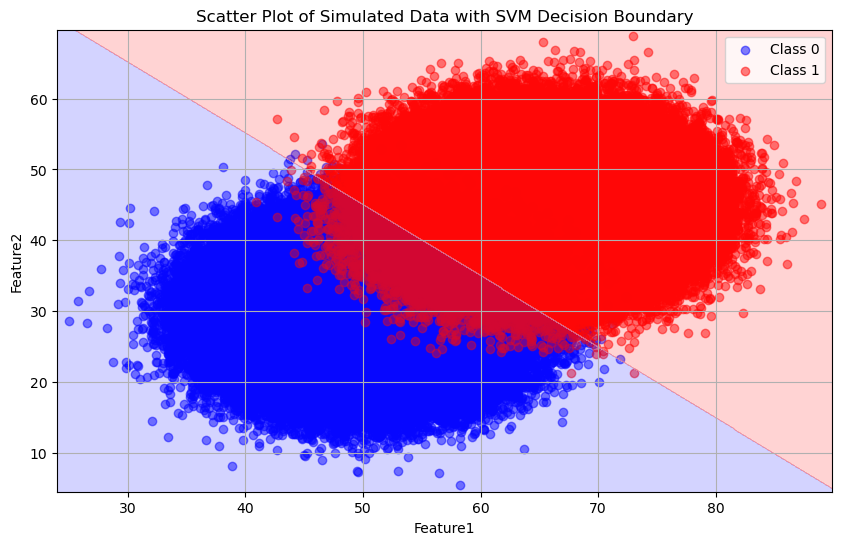

Predicted class for sample [60 40]: 1.0


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dataset generation remains the same
np.random.seed(0)
num_samples_per_class = 500000

# Class 0 (Non-Fraud)
class_0_feature1 = np.random.normal(50, 5, num_samples_per_class)   # mean=50, std=5
class_0_feature2 = np.random.normal(30, 5, num_samples_per_class)   # mean=30, std=5
class_0_labels = np.zeros(num_samples_per_class)

# Class 1 (Fraud)
class_1_feature1 = np.random.normal(65, 5, num_samples_per_class)   # mean=65, std=5
class_1_feature2 = np.random.normal(45, 5, num_samples_per_class)   # mean=45, std=5
class_1_labels = np.ones(num_samples_per_class)

# Combine into a DataFrame
data = pd.DataFrame({
    "Feature1": np.concatenate([class_0_feature1, class_1_feature1]),
    "Feature2": np.concatenate([class_0_feature2, class_1_feature2]),
    "Label": np.concatenate([class_0_labels, class_1_labels])
})

# Splitting data into features and labels
X = data[["Feature1", "Feature2"]].values
y = data["Label"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM with a linear kernel
model = SVC(kernel='linear', C=1.0)  # You can adjust C for regularization strength
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Plotting the decision boundary
plt.figure(figsize=(10, 6))

# Plot Class 0 data points in blue
plt.scatter(class_0_feature1, class_0_feature2, color='blue', alpha=0.5, label="Class 0")

# Plot Class 1 data points in red
plt.scatter(class_1_feature1, class_1_feature2, color='red', alpha=0.5, label="Class 1")

# Define plot limits and create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap="bwr")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Scatter Plot of Simulated Data with SVM Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

# Test prediction on a sample point
sample = np.array([[60, 40]])  # Example sample with Feature1=60, Feature2=40
predicted_class = model.predict(sample)
print(f"Predicted class for sample {sample[0]}: {predicted_class[0]}")
